<a href="https://colab.research.google.com/github/Ronin1289/Generating-Building-Drawings-Using-Image-Processing/blob/main/Sample_project_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating drawings of Buildings using Image Processing

##Abstract
Generating accurate drawings of existing buildings is often a time-consuming and costly process. In certain situations, such as with heritage structures, taking precise measurements can be challenging or even impossible. Thus, there is a pressing need for a novel, computer-aided approach to efficiently generate these drawings. This paper proposes a method that leverages image processing techniques to produce building drawings, significantly reducing both the time and cost associated with traditional methods.


The proposed approach utilizes image processing techniques, including kernel-based image detection and photogrammetry, to generate building drawings. The process begins with capturing an image of the building using a standard camera, resulting in a .jpg file. Edge detection techniques are then applied using Python-based image processing libraries, producing an image that highlights the building's contours. This contour image is subsequently converted into a Scalable Vector Graphics file (SVG). All these operations are conducted on Google Colab. Finally, the vector image is transformed into a Drawing Exchange Format(DXF) file using Inkscape, which serves as the final output. This DXF file can be opened and further manipulated in any computer-aided design (CAD) software, such as AutoCAD. For scaling purposes, only one physical measurement of the building is required, which can be input into the CAD software to scale the entire drawing accurately.

##Proposed Model
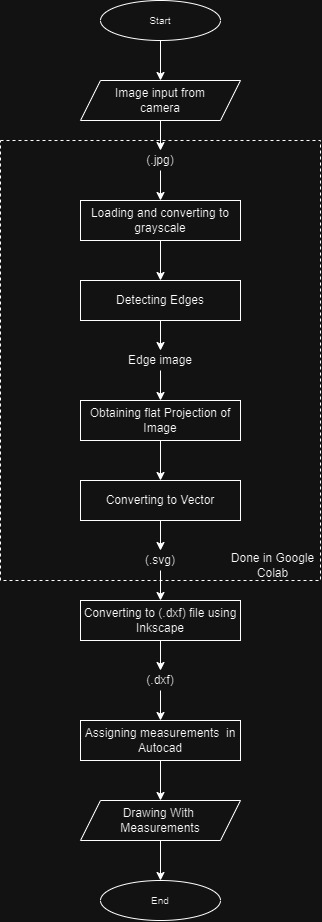

##Step 1.Loading Images

In [ ]:
#Importing Libraries required for Edge Detection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 1.2 MB/s eta 0:00:00


In [ ]:
#Importing Libraries required for Conversion to vector
from PIL import Image
import numpy as np
import svgwrite
from skimage import measure
from IPython.display import SVG, display
import io

<ipython-input-4-dd2e650811f1>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


(-0.5, 1004.5, 884.5, -0.5)

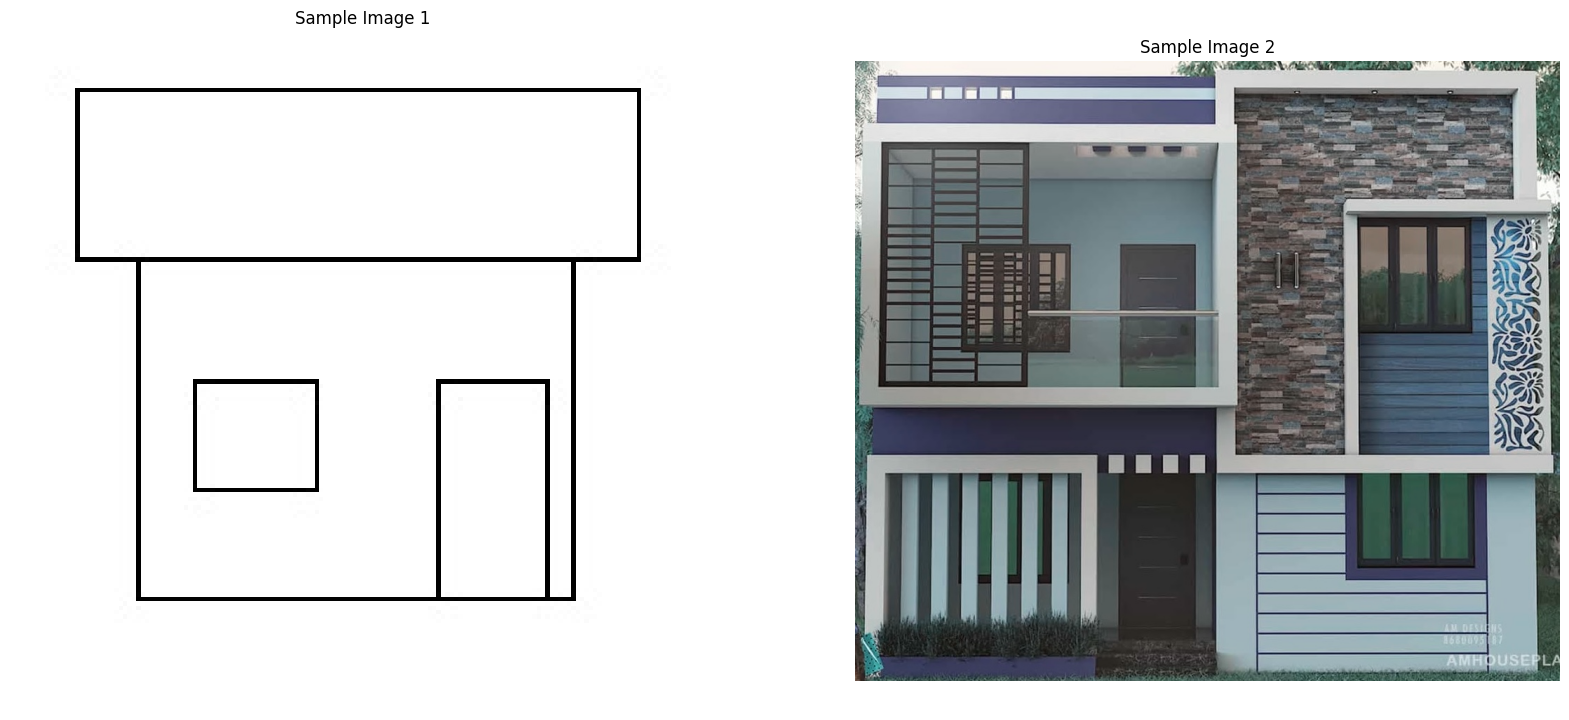

In [ ]:
#img1=cv2.imread('/content/drive/MyDrive/DATA/HOUSE_C.jpg')
img1=cv2.imread('/content/drive/MyDrive/DATA/HOUSE_S.jpg')
img2=cv2.imread('/content/drive/MyDrive/DATA/NET_HOUSE.jpg')
plt.figure(figsize=(20,10))
plt.title('Sample Image 1')
plt.subplot(1,2,1)
plt.title('Sample Image 1')
plt.imshow(img1)
plt.axis('off')

plt.subplot(1,2,2)
plt.title('Sample Image 2')
plt.imshow(img2)
plt.axis('off')

##Step 2.Detecting Edges

"plt.subplot(1,2,2)\nplt.title('Edge Image 2')\nplt.imshow(binary_image_of_sobel_on_canny_img2,cmap='gray')\nplt.axis('off')"

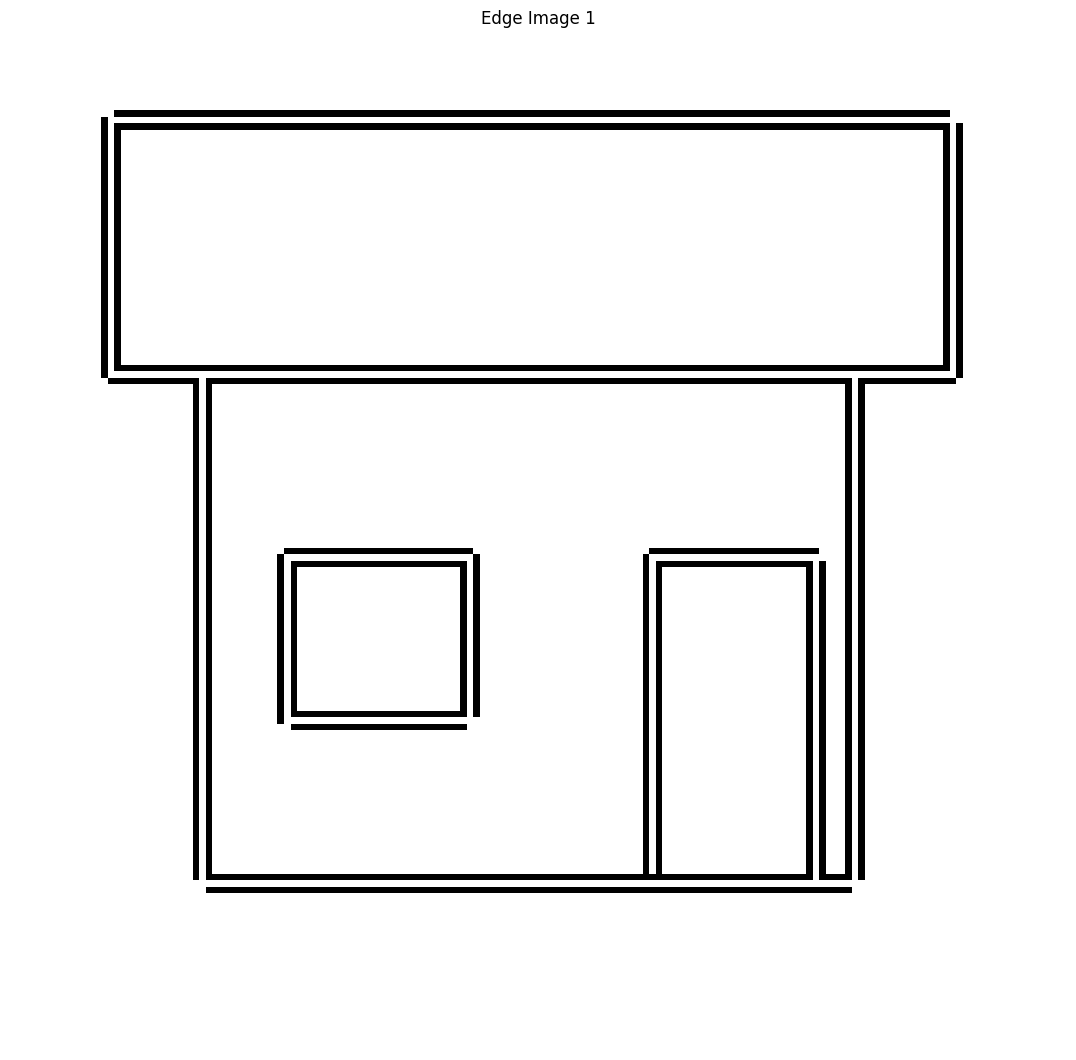

In [ ]:
#Applying Canny Edge detector
canny_img1=cv2.Canny(img1,20,30)
canny_img2=cv2.Canny(img2,10,20)

#Applying Sobel on Canny
sobel_on_canny_x_img1 = cv2.Sobel(canny_img1, cv2.CV_64F, 1, 0, ksize=7)
sobel_on_canny_y_img1 = cv2.Sobel(canny_img1, cv2.CV_64F, 0, 1, ksize=7)
sobel_on_canny_img1 = cv2.magnitude(sobel_on_canny_x_img1, sobel_on_canny_y_img1)

sobel_on_canny_x_img2 = cv2.Sobel(canny_img2, cv2.CV_64F, 1, 0, ksize=5)
sobel_on_canny_y_img2 = cv2.Sobel(canny_img2, cv2.CV_64F, 0, 1, ksize=5)
sobel_on_canny_img2 = cv2.magnitude(sobel_on_canny_x_img2, sobel_on_canny_y_img2)

#Using Thresholding to obtain Binary Image
_, binary_image_of_sobel_on_canny_img1 = cv2.threshold(sobel_on_canny_img1, 127, 255, cv2.THRESH_BINARY)
_, binary_image_of_sobel_on_canny_img2 = cv2.threshold(sobel_on_canny_img2, 127, 255, cv2.THRESH_BINARY)

binary_image_of_sobel_on_canny_img1 = cv2.bitwise_not(binary_image_of_sobel_on_canny_img1)
binary_image_of_sobel_on_canny_img2 = cv2.bitwise_not(binary_image_of_sobel_on_canny_img2)

#TESTINGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGGG
canny_img1=cv2.bitwise_not(canny_img1)


#Displaying Results
plt.figure(figsize=(30,20))
plt.subplot(1,2,1)
plt.title('Edge Image 1')
plt.imshow(canny_img1,cmap='gray')
#plt.imshow(binary_image_of_sobel_on_canny_img1,cmap='gray')
plt.axis('off')

'''plt.subplot(1,2,2)
plt.title('Edge Image 2')
plt.imshow(binary_image_of_sobel_on_canny_img2,cmap='gray')
plt.axis('off')'''


##Step 3.Converting to Vector Image

In [ ]:
from PIL import Image
import numpy as np
import svgwrite
from skimage import measure
from IPython.display import SVG, display
import io


np_image =  canny_img1 # Example: creating a random image


# Convert the NumPy array to a PIL Image
pil_image = Image.fromarray(np_image)

# Load the image and convert it to grayscale
img = pil_image

binary = canny_img1
# Find contours using scikit-image
contours = measure.find_contours(binary, level=0.5)

# Create an SVG drawing
svg_filename = "output.svg"
dwg = svgwrite.Drawing(svg_filename, profile='tiny')

# Add contours to the SVG
for contour in contours:
    points = [(point[1], point[0]) for point in contour]  # Flip x and y
    dwg.add(dwg.polyline(points, stroke='black', fill='none'))

# Save the SVG file
dwg.save()

# Display the SVG
display(SVG(svg_filename))

# Provide a download link
from google.colab import files
files.download(svg_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Step 4.Conveerting vector file to DXF file

This is done using a vector graphic editing software called Inkscape.

###Inkscape
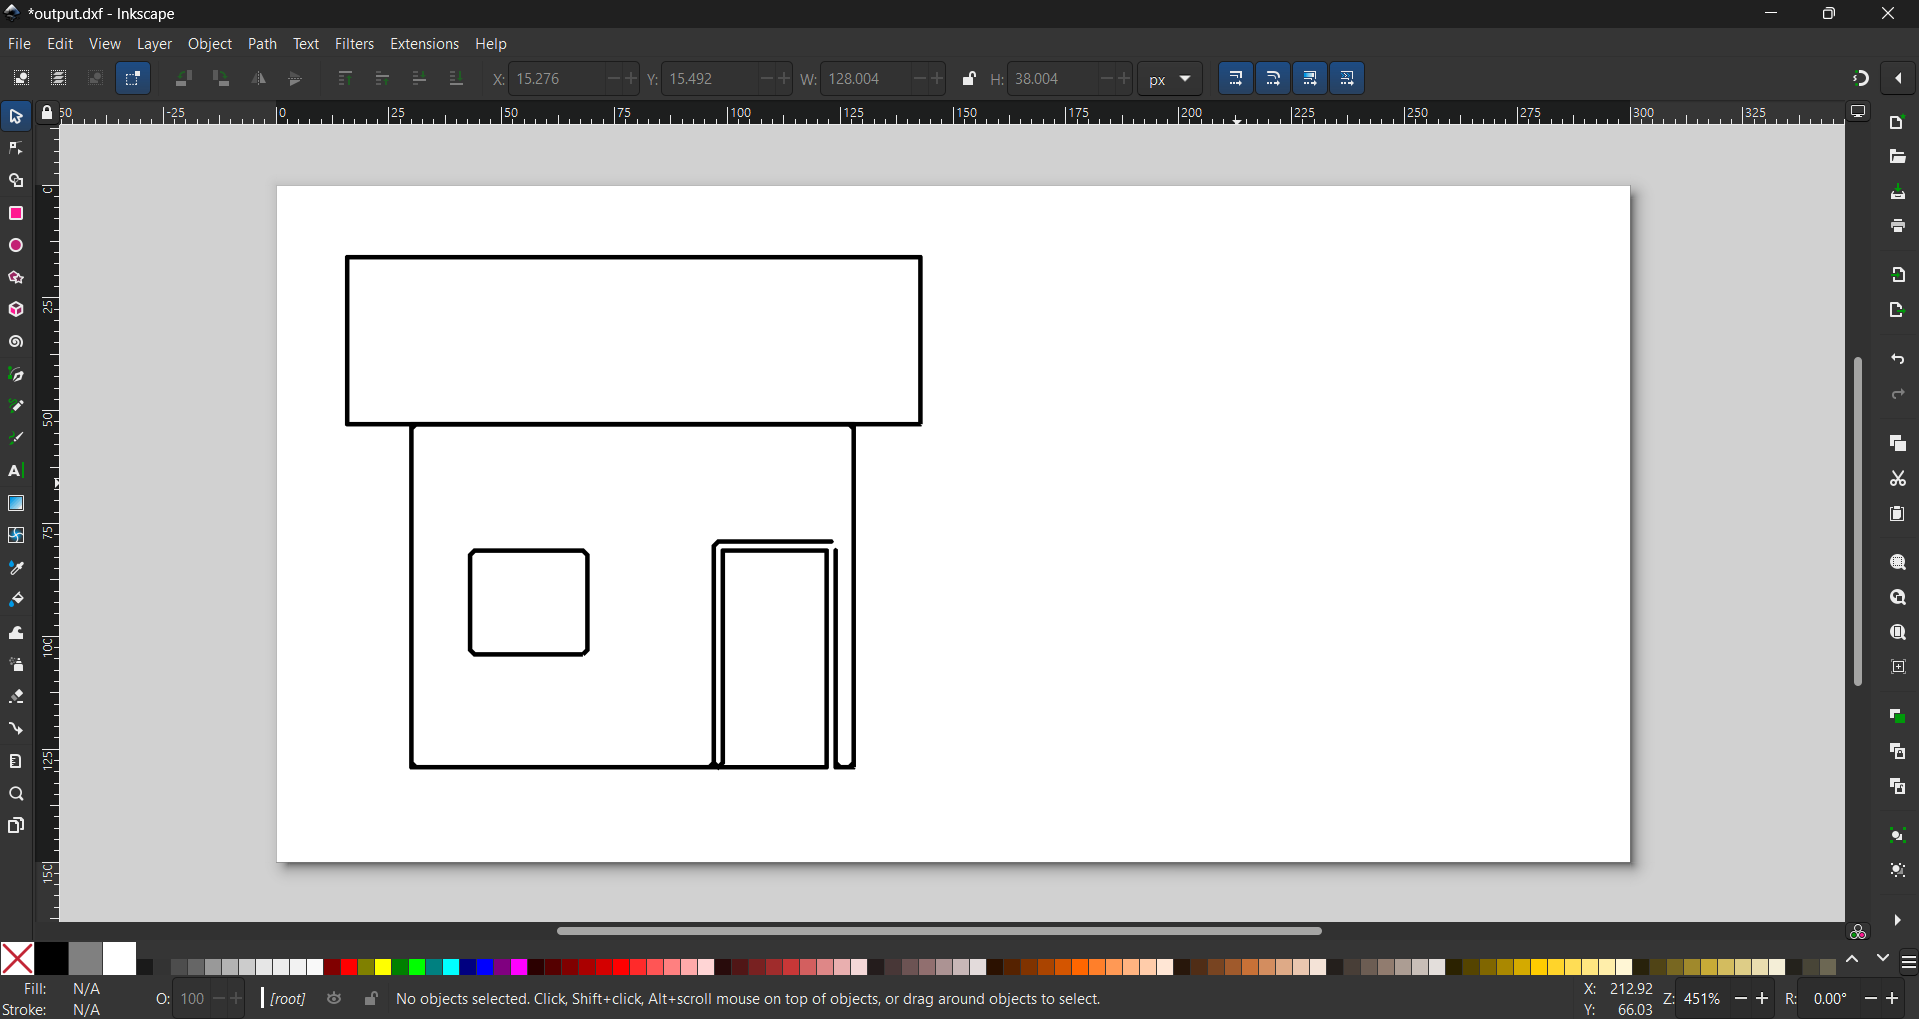

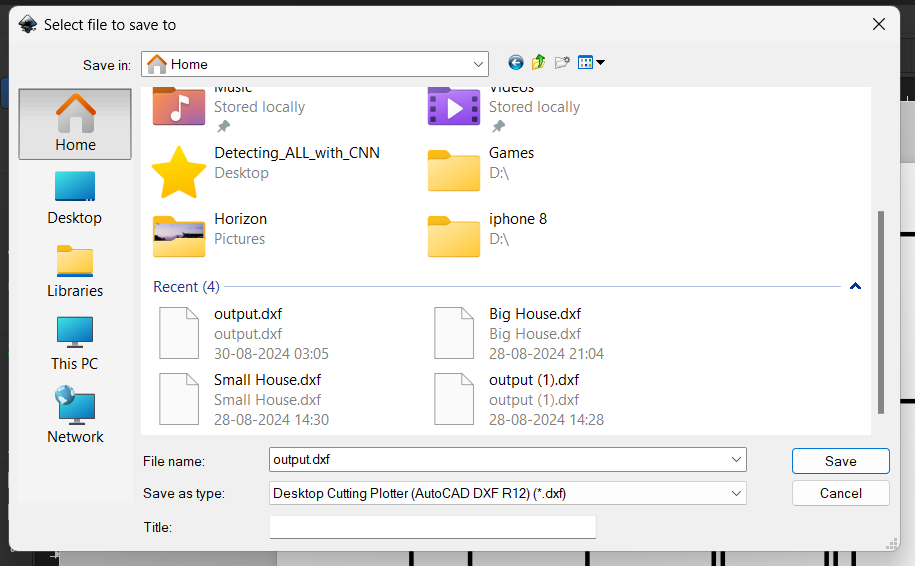

##Step 5.Scaling in Autocad

It is done by scaling the generated drawing to a refrence line whose length is equal to the measured length of a component of building.

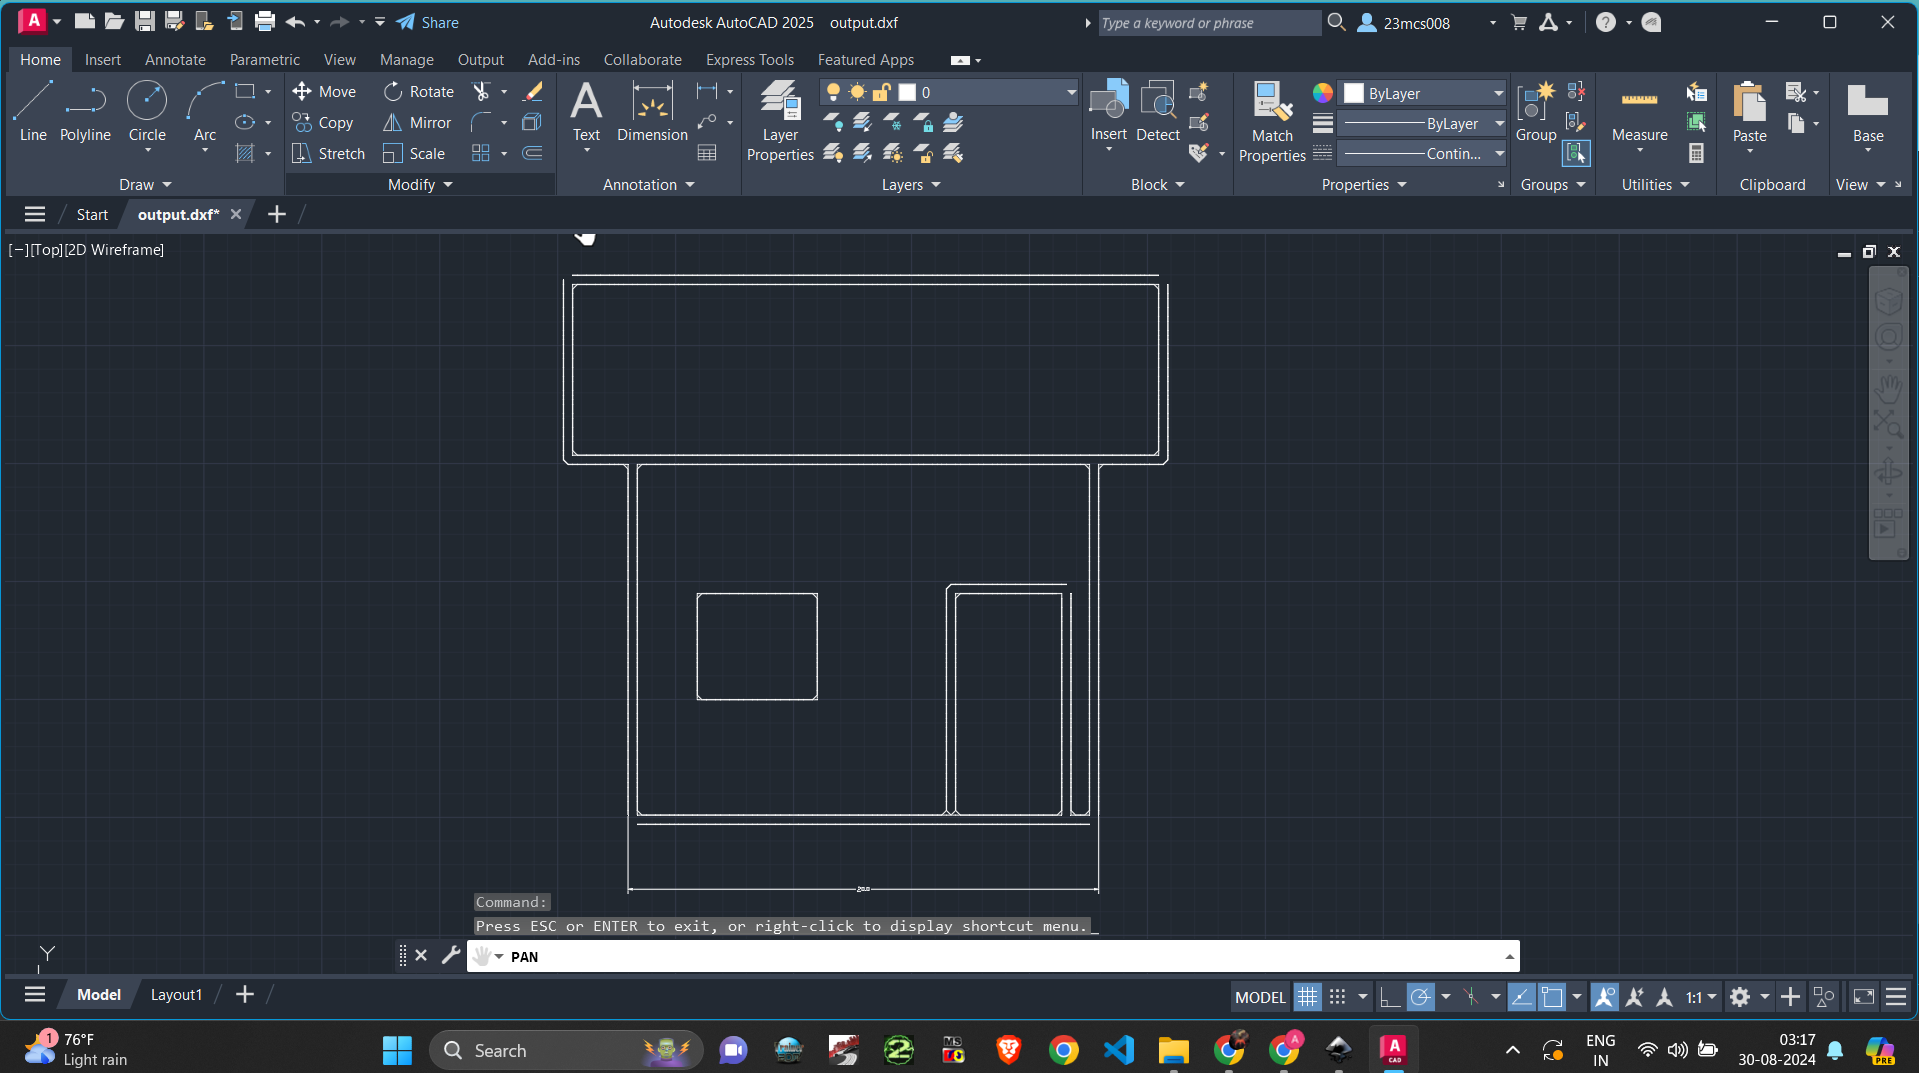

###Rest of the dimmensions can be assigned using the tools available in Autocad software.



##Final Output

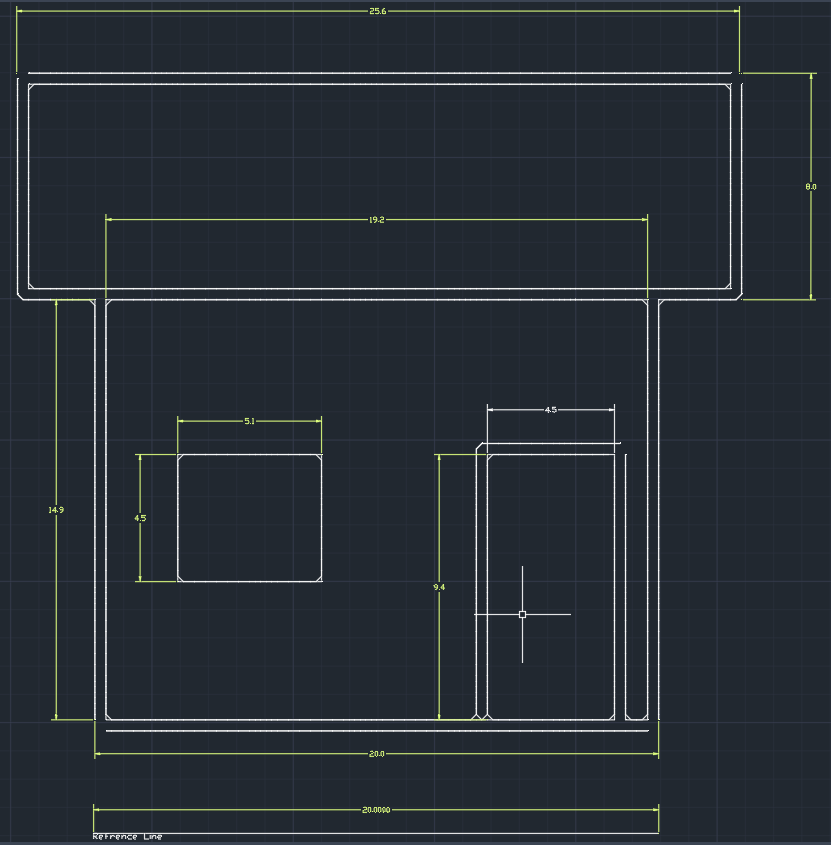

###End Of File